In [1]:
import pandas as pd
import numpy as np

In [2]:
adult_df=pd.read_csv('adult_data.csv',header=None,delimiter=' *, *',engine='python')
adult_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
adult_df.shape

(32561, 15)

In [5]:
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation', 'relationship',
'race', 'sex', 'capital_gain', 'capital_loss',
'hours_per_week', 'native_country', 'income']
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
adult_df_rev=pd.DataFrame.copy(adult_df)
adult_df_rev=adult_df_rev.drop(["education","fnlwgt"],axis=1)

In [7]:
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [8]:
adult_df_rev=adult_df_rev.replace(['?'],np.nan)
adult_df_rev.isnull().sum()

age                  0
workclass         1836
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [9]:
#replace the missing values with mode values
for value in ['workclass', 'occupation','native_country']:
    adult_df_rev[value].fillna(adult_df_rev[value].mode()[0],inplace=True)

In [10]:
adult_df_rev.workclass.mode()

0    Private
dtype: object

In [11]:
"""
for x in adult_df_rev.columns[:]:
    if adult_df_rev[x].dtype=='object':
        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)
    elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':
        adult_df_rev[x].fillna(adult_df_rev[x].mean(),inplace=True)
"""

"\nfor x in adult_df_rev.columns[:]:\n    if adult_df_rev[x].dtype=='object':\n        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)\n    elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':\n        adult_df_rev[x].fillna(adult_df_rev[x].mean(),inplace=True)\n"

In [12]:
adult_df_rev.workclass.value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [13]:
#converting categoricals data to numerical
#1> Creating Dummy Variables-> pd.get_dummies(), OneHotEncoder()
#2> Crating levels -> LabelEncoder()
#3> Manual Encoding -> map

colname=[]
for x in adult_df_rev.columns[:]:
    if adult_df_rev[x].dtype=='object':
        colname.append(x)
colname


"""colname = ['workclass',
'marital_status', 'occupation',
'relationship','race', 'sex',
'native_country', 'income']"""
colname

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [14]:
#For preprocessing the data
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for x in colname:
    adult_df_rev[x]=le.fit_transform(adult_df_rev[x])

In [15]:
adult_df_rev.head()
#0--> <=50K
#1--> >50K

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [16]:
adult_df_rev.dtypes

age               int64
workclass         int32
education_num     int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int32
income            int32
dtype: object

In [17]:
X = adult_df_rev.values[:,:-1]
Y = adult_df_rev.values[:,-1]

In [18]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X)

X=scaler.transform(X)
print(X)

[[ 0.03067056  2.62429763  1.13473876 ... -0.21665953 -0.03542945
   0.26136999]
 [ 0.83710898  1.72109965  1.13473876 ... -0.21665953 -2.22215312
   0.26136999]
 [-0.04264203 -0.08529633 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]
 ...
 [ 1.42360965 -0.08529633 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]
 [-1.21564337 -0.08529633 -0.42005962 ... -0.21665953 -1.65522476
   0.26136999]
 [ 0.98373415  0.81790166 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]]


In [19]:
Y=Y.astype(int) #to avoid the error unknown label unknown  which is generated due to the incompatibility of the datatypes of x and y

In [20]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [21]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(list(zip(Y_test,Y_pred)))

print(classifier.coef_)
print(classifier.intercept_)

[(0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 1), (0, 0), (0, 0), (1, 0), (1, 1), (1, 0), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (0, 1), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (1, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification Report: ")

print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the Model: ",acc)

[[7017  406]
 [1316 1030]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.44      0.54      2346

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the Model:  0.8237281195618794


In [23]:
y_pred_prob=classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.96860653 0.03139347]
 [0.97030158 0.02969842]
 [0.23862252 0.76137748]
 ...
 [0.81402337 0.18597663]
 [0.82524908 0.17475092]
 [0.1567879  0.8432121 ]]


In [24]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value>0.45:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

print(y_pred_class)

[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 

In [25]:
from sklearn .metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
acc=accuracy_score(Y_test,y_pred_class)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test,y_pred_class))

[[6878  545]
 [1189 1157]]
Accuracy of the model:  0.8224997440884431
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7423
           1       0.68      0.49      0.57      2346

    accuracy                           0.82      9769
   macro avg       0.77      0.71      0.73      9769
weighted avg       0.81      0.82      0.81      9769



In [26]:
for a in np.arange(0.4,0.6,0.01):
    predict_mine=np.where(y_pred_prob[:,1]>a,1,0)
    cfm=confusion_matrix(Y_test,predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at Threshold ",a,":",total_err," , type 2 error :", cfm[1,0]," , type 1 error: ",cfm[0,1])

Errors at Threshold  0.4 : 1768  , type 2 error : 1072  , type 1 error:  696
Errors at Threshold  0.41000000000000003 : 1748  , type 2 error : 1096  , type 1 error:  652
Errors at Threshold  0.42000000000000004 : 1749  , type 2 error : 1115  , type 1 error:  634
Errors at Threshold  0.43000000000000005 : 1760  , type 2 error : 1144  , type 1 error:  616
Errors at Threshold  0.44000000000000006 : 1753  , type 2 error : 1168  , type 1 error:  585
Errors at Threshold  0.45000000000000007 : 1734  , type 2 error : 1189  , type 1 error:  545
Errors at Threshold  0.4600000000000001 : 1721  , type 2 error : 1208  , type 1 error:  513
Errors at Threshold  0.4700000000000001 : 1717  , type 2 error : 1232  , type 1 error:  485
Errors at Threshold  0.4800000000000001 : 1727  , type 2 error : 1268  , type 1 error:  459
Errors at Threshold  0.4900000000000001 : 1722  , type 2 error : 1295  , type 1 error:  427
Errors at Threshold  0.5000000000000001 : 1722  , type 2 error : 1316  , type 1 error:  40

In [27]:


from sklearn import metrics

fpr, tpr,z = metrics.roc_curve(Y_test, y_pred_class)
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

0.709879715347531
[0.         0.07342045 1.        ]
[0.         0.49317988 1.        ]


In [28]:

 

import matplotlib.pyplot as plt
#%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


<Figure size 640x480 with 1 Axes>

In [29]:
from sklearn import metrics
fpr, tpr, z=metrics.roc_curve(Y_test,y_pred_prob[:,1])
auc=metrics.auc(fpr,tpr)
print(auc)

0.8510128825880344


In [30]:
#Using cross validation

classifier=(LogisticRegression())

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10)
print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,y=Y_train, cv=kfold_cv)

print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

KFold(n_splits=10, random_state=None, shuffle=False)


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[0.81842105 0.81403509 0.81790259 0.85037297 0.82974989 0.82492321
 0.80824923 0.8174638  0.83106626 0.82843352]
0.8240617614681722


In [31]:

for train_value, test_value in kfold_cv.split(X_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])

Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [32]:
from sklearn .metrics import confusion_matrix,accuracy_score,classification_report
confusion_matrix=confusion_matrix(Y_test,Y_pred)
print(confusion_matrix)


[[7016  407]
 [1315 1031]]


In [33]:
colname=adult_df_rev.columns[:]

In [34]:
from sklearn.feature_selection import RFE
rfe=RFE(classifier,8)
model_rfe=rfe.fit(X_train,Y_train)
print("Num Features: ",model_rfe.n_features_)
print("Selected Features: ")
print(list(zip(colname,model_rfe.support_)))
print("Feature Ranking: ",model_rfe.ranking_)

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Num Features:  8
Selected Features: 
[('age', True), ('workclass', False), ('education_num', True), ('marital_status', True), ('occupation', False), ('relationship', True), ('race', False), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', False)]
Feature Ranking:  [1 3 1 1 4 1 2 1 1 1 1 5]


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
from sklearn.feature_selection import RFE
rfe=RFE(classifier,8)
model_rfe=rfe.fit(X_train,Y_train)
print("Num Features: ",model_rfe.n_features_)
print("Selected Features: ")
print(list(zip(colname,model_rfe.support_)))
print("Feature Ranking: ",model_rfe.ranking_)

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Num Features:  8
Selected Features: 
[('age', True), ('workclass', False), ('education_num', True), ('marital_status', True), ('occupation', False), ('relationship', True), ('race', False), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', False)]
Feature Ranking:  [1 3 1 1 4 1 2 1 1 1 1 5]


In [36]:
import warnings
warnings.filterwarnings("ignore")

In [37]:
Y_pred=model_rfe.predict(X_test)

In [38]:
new_data=adult_df_rev[['age','workclass','occupation','sex','income']]
new_data.head()
new_X=new_data.values[:,:-1]
new_Y=new_data.values[:,-1]
print(new_X)
print(new_Y)

[[39  6  0  1]
 [50  5  3  1]
 [38  3  5  1]
 ...
 [58  3  0  0]
 [22  3  0  1]
 [52  4  3  0]]
[0 0 0 ... 0 0 1]


In [39]:
X=adult_df_rev.values[:,:-1]
Y=adult_df_rev.values[:,-1]

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test = SelectKBest(score_func=chi2, k=10)
fit1 = test.fit(X, Y)
print(fit1.scores_)
print(list(zip(colname,fit1.get_support())))
X = fit1.transform(X)
print(X)

[8.60061182e+03 9.35436386e-02 2.40142178e+03 1.12346982e+03
 1.00356439e+02 3.65914312e+03 3.30313051e+01 5.02439419e+02
 8.21924671e+07 1.37214589e+06 6.47640900e+03 1.74341889e+01]
[('age', True), ('workclass', False), ('education_num', True), ('marital_status', True), ('occupation', True), ('relationship', True), ('race', True), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', False)]
[[   39    13     4 ...  2174     0    40]
 [   50    13     2 ...     0     0    13]
 [   38     9     0 ...     0     0    40]
 ...
 [   58     9     6 ...     0     0    40]
 [   22     9     4 ...     0     0    20]
 [   52     9     2 ... 15024     0    40]]


In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [43]:
"""from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state)"""

'from sklearn.model_selection import train_test_split\nX_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state)'

In [48]:


from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(0.3)
fit1 = vt.fit(X, Y)
print(fit1.variances_)

features = fit1.transform(X)
print(features)
print(features.shape[1])
print(list(zip(colname,fit1.get_support())))


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[ 0.03067056  1.13473876  0.92163395 ...  0.1484529  -0.21665953
  -0.03542945]
 [ 0.83710898  1.13473876 -0.4062122  ... -0.14592048 -0.21665953
  -2.22215312]
 [-0.04264203 -0.42005962 -1.73405835 ... -0.14592048 -0.21665953
  -0.03542945]
 ...
 [ 1.42360965 -0.42005962  2.24948009 ... -0.14592048 -0.21665953
  -0.03542945]
 [-1.21564337 -0.42005962  0.92163395 ... -0.14592048 -0.21665953
  -1.65522476]
 [ 0.98373415 -0.42005962 -0.4062122  ...  1.88842434 -0.21665953
  -0.03542945]]
10
[('age', True), ('workclass', True), ('education_num', True), ('marital_status', True), ('occupation', True), ('relationship', True), ('race', True), ('sex', True), ('capital_gain', True), ('capital_loss', True)]


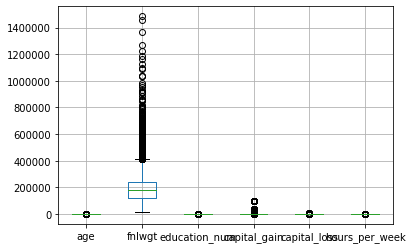

In [50]:
import matplotlib.pyplot as plt

adult_df.boxplot()
plt.show()

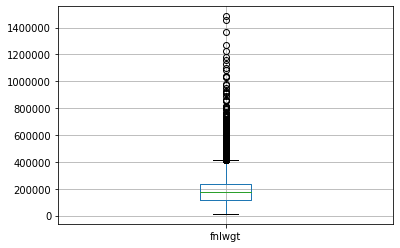

In [52]:
adult_df.boxplot(column='fnlwgt')
plt.show()

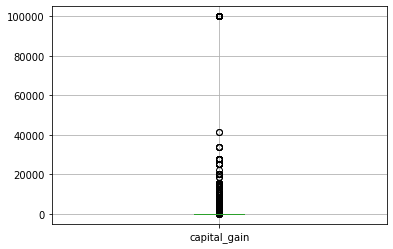

In [54]:
adult_df.boxplot(column='capital_gain')
plt.show()

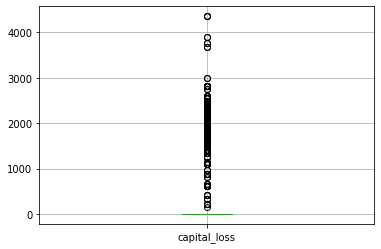

In [56]:
adult_df.boxplot(column='capital_loss')
plt.show()

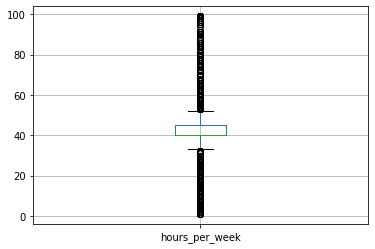

In [58]:
adult_df.boxplot(column='hours_per_week')
plt.show()

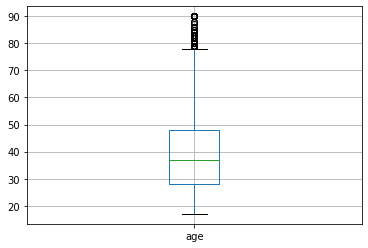

In [64]:
adult_df.boxplot(column='age')
plt.show()

In [66]:
#if you see a cluster of point(outliers) do not impute it.
#if the logic relevent ot the variable do not impute it.
#if you are working upon monetary values do not impute outliers for those values.

In [70]:
#for value in clname
q1=adult_df['age'].quantile(0.25)#first quartile value
q3=adult_df['age'].quantile(0.75)#third quartile value
iqr=q3-q1
low=q1-1.5*iqr
high=q3+1.5*iqr

In [76]:
adult_df_include=adult_df.loc[(adult_df['age']>=low)&(adult_df['age']<=high)]
adult_df_exclude=adult_df.loc[(adult_df['age']<low)|(adult_df['age']>high)]
print(adult_df_include.shape)
print(adult_df_exclude.shape)
print(low)

(32418, 15)
(143, 15)
-2.0


In [79]:
age_mean=int(adult_df_include.age.mean())
print(age_mean)

38


In [81]:
#imputing outlier values with mean value
adult_df_exclude.age=age_mean

In [83]:
#getting back the original shape of the df
adult_df_rev=pd.concat([adult_df_include,adult_df_exclude])
adult_df_rev.shape

(32561, 15)

In [85]:
adult_df_exclude.loc[adult_df_exclude["age"]<low,"age"]=low
adult_df_exclude.loc[adult_df_exclude["age"]>high,"age"]=high

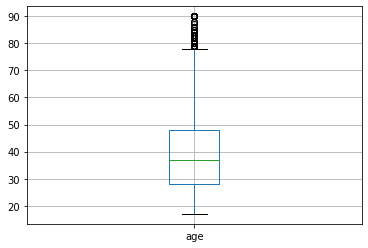

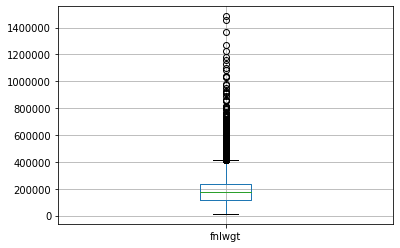

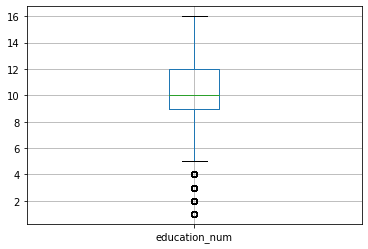

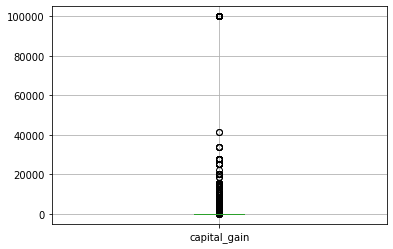

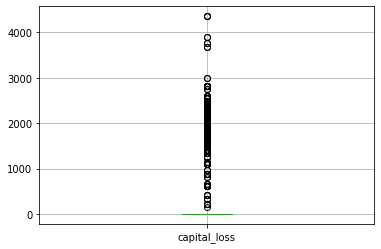

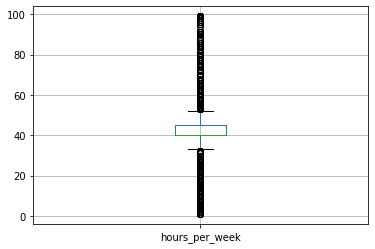

In [87]:


import matplotlib.pyplot as plt
colname=[]
for x in adult_df.columns[:-1]:
    if adult_df[x].dtype=="int64" or adult_df[x].dtype=="float64":
        colname.append(x)

for x in colname:
    adult_df.boxplot(column=x)
    plt.show()
